In [62]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, adjusted_rand_score
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import KarateClub

## Create Model 

In [63]:
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


In [64]:
dataset = KarateClub()
data = dataset[0]

In [66]:
labels_true = data.y.numpy()

In [67]:
# ---------- GCN ----------
model = GCN(dataset.num_node_features, 16, dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [68]:
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
            print(f" Epoch {epoch+1:02d} | Loss: {loss.item():.4f}")

 Epoch 10 | Loss: 1.1551
 Epoch 20 | Loss: 0.9213
 Epoch 30 | Loss: 0.6612
 Epoch 40 | Loss: 0.4297
 Epoch 50 | Loss: 0.2673
 Epoch 60 | Loss: 0.1713
 Epoch 70 | Loss: 0.1179
 Epoch 80 | Loss: 0.0866
 Epoch 90 | Loss: 0.0669
 Epoch 100 | Loss: 0.0537
 Epoch 110 | Loss: 0.0447
 Epoch 120 | Loss: 0.0382
 Epoch 130 | Loss: 0.0335
 Epoch 140 | Loss: 0.0300
 Epoch 150 | Loss: 0.0274
 Epoch 160 | Loss: 0.0253
 Epoch 170 | Loss: 0.0236
 Epoch 180 | Loss: 0.0223
 Epoch 190 | Loss: 0.0212
 Epoch 200 | Loss: 0.0204


In [69]:
model.eval()
pred_gcn = model(data.x, data.edge_index).argmax(dim=1).numpy()

acc_gcn = accuracy_score(labels_true, pred_gcn)
ari_gcn = adjusted_rand_score(labels_true, pred_gcn)

In [70]:
# ---------- result ----------
print("GCN                → Accuracy:", acc_gcn, " | ARI:", ari_gcn)


GCN                → Accuracy: 1.0  | ARI: 1.0


In [71]:
import matplotlib.pyplot as plt
import networkx as nx

In [72]:
## Create Graph
edge_index = data.edge_index.numpy()
G = nx.Graph()
G.add_edges_from(edge_index.T)

In [80]:
print("Labels True:" , labels_true)
print("Prediction:", pred_gcn)

Labels True: [1 1 1 1 3 3 3 1 0 1 3 1 1 1 0 0 3 1 0 1 0 1 0 0 2 2 0 0 2 0 0 2 0 0]
Prediction: [1 1 1 1 3 3 3 1 0 1 3 1 1 1 0 0 3 1 0 1 0 1 0 0 2 2 0 0 2 0 0 2 0 0]


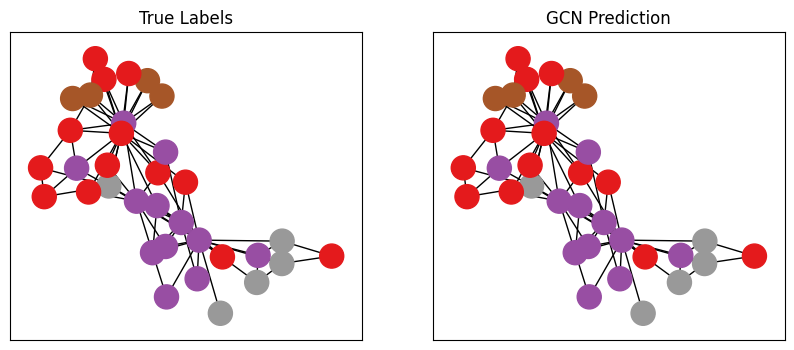

In [81]:
pos = nx.spring_layout(G, seed=42)  # seed, It stabilizes the location. 
vmin = min(labels_true)
vmax = max(labels_true)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
nx.draw_networkx(G, pos=pos, node_color=labels_true, with_labels=False,
                 cmap=plt.cm.Set1, vmin=vmin, vmax=vmax)
plt.title("True Labels")

plt.subplot(1, 2, 2)
nx.draw_networkx(G, pos=pos, node_color=pred_gcn, with_labels=False,
                 cmap=plt.cm.Set1, vmin=vmin, vmax=vmax)
plt.title("GCN Prediction")

plt.show()


In [83]:
edge_index.shape

(2, 156)

In [85]:
data.num_edges

156

In [89]:
edge_index[1]

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,
        2,  3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28,
       32,  0,  1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5,
       16,  0,  1,  2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4,  5,  0,  0,
        3,  0,  1,  2,  3, 33, 32, 33, 32, 33,  5,  6,  0,  1, 32, 33,  0,
        1, 33, 32, 33,  0,  1, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31, 23,
       24, 31, 29, 33,  2, 23, 24, 33,  2, 31, 33, 23, 26, 32, 33,  1,  8,
       32, 33,  0, 24, 25, 28, 32, 33,  2,  8, 14, 15, 18, 20, 22, 23, 29,
       30, 31, 33,  8,  9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29,
       30, 31, 32])

In [94]:
edge_index[:,:2]

array([[0, 0],
       [1, 2]])